#EXploration Data Analysis (EDA)

##Import Library

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path = r"D:\Intern Lab IS 2025\Data Transform\data transform.parquet"
df = pd.read_parquet(file_path)

##Upload Dataset

In [3]:
print(df.head(5))

                  date                                               text  \
0  2018-07-07 22:09:11  If you decide to eat here, just be aware it is...   
1  2014-02-05 20:30:30  Family diner. Had the buffet. Eclectic assortm...   
2  2015-01-04 00:01:03  Wow!  Yummy, different,  delicious.   Our favo...   
3  2017-01-14 20:54:15  Cute interior and owner (?) gave us tour of up...   
4  2015-09-23 23:10:31  I am a long term frequent customer of this est...   

           city state  review_stars  sentiment sentiment_label  
0   North Wales    PA           3.0          1         Neutral  
1        Tucson    AZ           3.0          1         Neutral  
2  Philadelphia    PA           5.0          2        Positive  
3   New Orleans    LA           4.0          2        Positive  
4  Philadelphia    PA           1.0          0        Negative  


In [4]:
sentiment_counts = df["sentiment_label"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"]
print(sentiment_counts)

  Sentiment    Count
0  Positive  3209836
1  Negative   971722
2   Neutral   543126


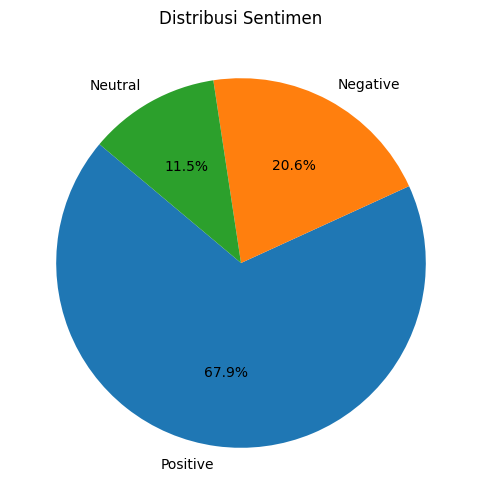

In [5]:
counts = df["sentiment_label"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribusi Sentimen")
plt.show()

C:\Users\SN5CD\AppData\Local\Temp\ipykernel_18256\718218331.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_per_state.groupby("state")["count"]


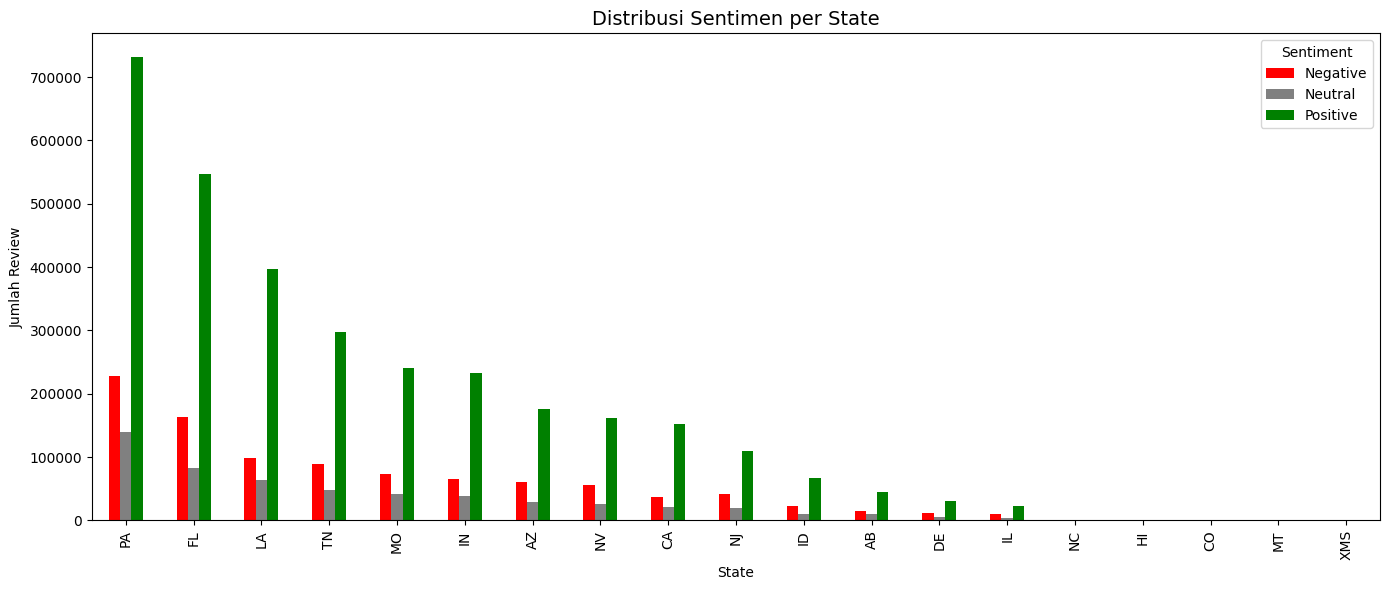

In [6]:
#1. Grouping bertahap untuk hemat memori
grouped = []

for state in df["state"].unique():
    sub_df = df[df["state"] == state]
    g = sub_df.groupby("sentiment_label").size().reset_index(name="count")
    g["state"] = state
    grouped.append(g)

sentiment_per_state = pd.concat(grouped, ignore_index=True)

#2. Urutkan berdasarkan total review per state
state_order = (
    sentiment_per_state.groupby("state")["count"].sum()
    .sort_values(ascending=False)
    .index
)
sentiment_per_state["state"] = pd.Categorical(
    sentiment_per_state["state"], categories=state_order, ordered=True
)

#3. Buat tabel total per state
total_per_state = (
    sentiment_per_state.groupby("state")["count"]
    .sum()
    .reset_index()
    .sort_values(by="count", ascending=False)
)

#4. Pivot untuk visualisasi
pivot_df = (
    sentiment_per_state.pivot(index="state", columns="sentiment_label", values="count")
    .fillna(0)
)

#5. Plot hasil
pivot_df.plot(
    kind="bar", stacked=False, figsize=(14, 6),
    color={"Positive": "green", "Neutral": "gray", "Negative": "red"}
)

plt.title("Distribusi Sentimen per State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Jumlah Review")
plt.legend(title="Sentiment")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
print("=== Jumlah Total Review per State ===")
display(total_per_state.style.set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
        .format({'count': '{:,}'}))

=== Jumlah Total Review per State ===


,state,count
0,PA,"1,100,276"
1,FL,"792,141"
2,LA,"558,347"
3,TN,"434,709"
4,MO,"354,613"
5,IN,"335,843"
6,AZ,"267,088"
7,NV,"243,649"
8,CA,"211,748"
9,NJ,"171,206"


In [8]:
#Tabel per state per sentiment
sentiment_sorted = sentiment_per_state.sort_values(by=["state", "sentiment_label"])
print("\n=== Jumlah Review per State per Sentiment ===")
display(sentiment_sorted.style.set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
        .format({'count': '{:,}'}))


=== Jumlah Review per State per Sentiment ===


,sentiment_label,count,state
0,Negative,"227,705",PA
1,Neutral,"140,183",PA
2,Positive,"732,388",PA
18,Negative,"162,630",FL
19,Neutral,"82,637",FL
20,Positive,"546,874",FL
6,Negative,"98,700",LA
7,Neutral,"63,218",LA
8,Positive,"396,429",LA
21,Negative,"89,233",TN


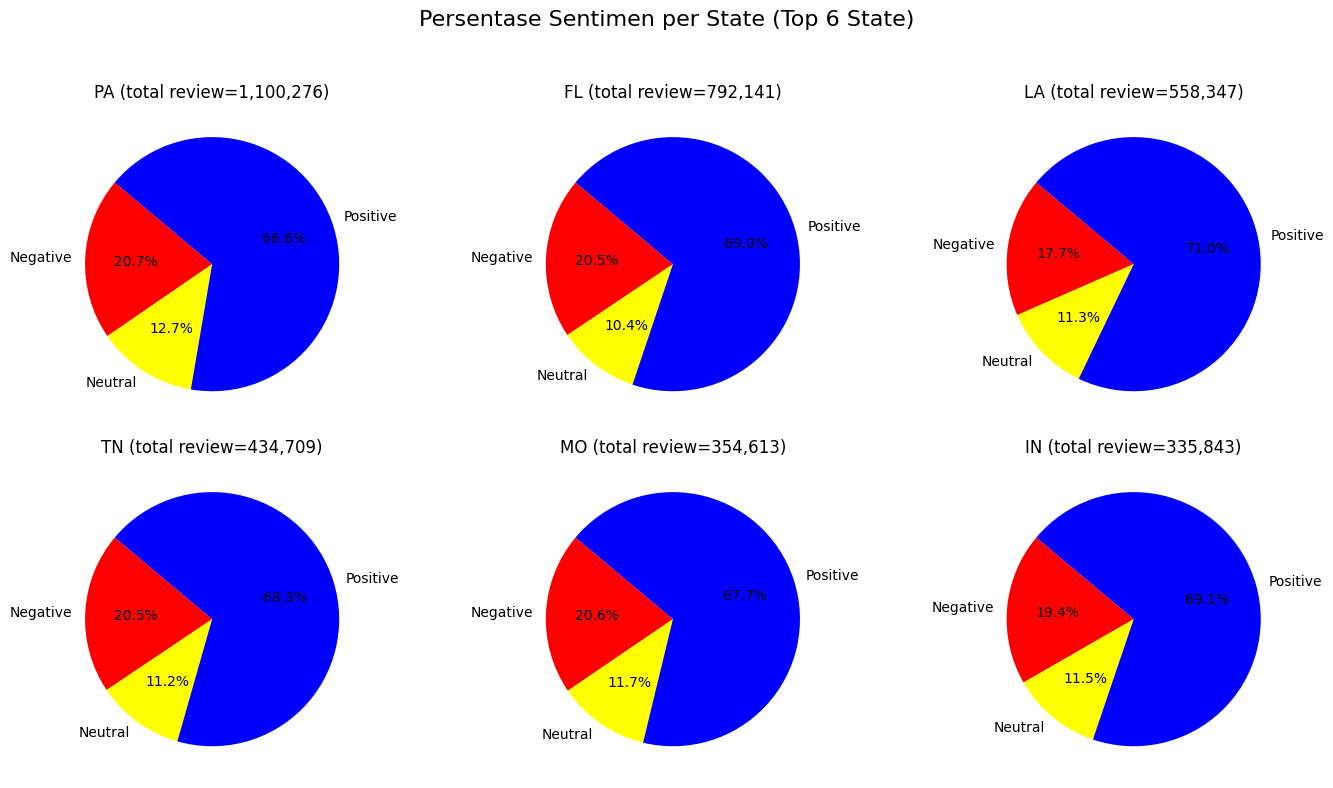

In [9]:
# Hitung jumlah per state dan sentiment_label
sentiment_per_state = (
    df.groupby(["state", "sentiment_label"])
      .size()
      .reset_index(name="count")
)

# Urutkan berdasarkan total review per state
state_order = (
    sentiment_per_state.groupby("state")["count"]
    .sum()
    .sort_values(ascending=False)
    .index
)

# Ambil hanya top 6 state (biar muat di visual)
top_states = state_order[:6]

# Filter hanya top state
sentiment_top_states = sentiment_per_state[sentiment_per_state["state"].isin(top_states)]

# Buat 2x3 grid untuk 6 state
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

colors = {"Positive": "blue", "Neutral": "yellow", "Negative": "red"}

for i, state in enumerate(top_states):
    state_data = sentiment_top_states[sentiment_top_states["state"] == state]
    axes[i].pie(
        state_data["count"],
        labels=state_data["sentiment_label"],
        autopct="%1.1f%%",
        colors=[colors[label] for label in state_data["sentiment_label"]],
        startangle=140
    )
    axes[i].set_title(f"{state} (total review={state_data['count'].sum():,})")

# Rapikan layout
plt.suptitle("Persentase Sentimen per State (Top 6 State)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()